# Fitbod HW
## Cahyarini (Crystal) Hariga

Question that will be focused on:
1. How are users utilizing Fitbod's app for their fitness goals?

In [15]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Setting up plotting templates
sns.set_style("whitegrid") # theme
sns.set_palette("Pastel1") # color palette
sns.set(font_scale =1) # font size

In [16]:
# Reading the data
df = pd.read_csv('fitbod_Crystal_Cahyarini_Hariga_20220408-153528.csv')
df.head(10)

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2021-07-01,87aB6F9SBc,pM3aRwuufC,2Ef9bES8oX,Stability Ball Hyperextension,10,0.000000,fake_id_531
1,2021-10-26,Ly4x0zYLg2,3GvUTFN8up,EOzunaWERE,Calf Raise,11,0.000000,fake_id_586
2,2021-04-23,tmPdFzpZbY,1mSqEHZVVv,DiQZdXoCsQ,Machine Reverse Fly,8,45.359291,fake_id_568
3,2021-05-09,zQF4UcAHiM,UQBXLgsfXN,untHO1vmxB,Dumbbell Shrug,9,22.500000,fake_id_541
4,2021-05-26,HtdthBumna,aIzmfLklht,JBHj8t70D3,Dumbbell Step Up,10,4.535929,fake_id_560
5,2021-03-30,oNYRDlFGZk,BN1DjSE1Zi,3R4GKfF0Wf,Romanian Deadlift,8,52.163185,fake_id_536
6,2021-05-03,5DOT4pJPh8,3GvUTFN8up,DoGByGVH6Z,Calf Raise,11,0.000000,fake_id_568
7,2021-10-28,xnpycxQ8vB,EAjKaB5zWy,YGNh3ZsaS5,Dumbbell Kickbacks,14,4.535929,fake_id_547
8,2021-02-23,LNFyHHT0Fz,4IMiKZHvCG,eVsCeog1JL,Shotgun Row,3,22.679645,fake_id_551
9,2021-07-26,dRAqr3Fwtt,gALxFFZcI4,PGYNCfc8Xu,Dumbbell Decline Bench Press,12,29.483539,fake_id_564


## Overall Data

In [17]:
# Check for missing values
print(df.isnull().sum())
print(df.dtypes)

Date            0
workoutId       0
exerciseId      0
singleSetId     0
exerciseName    0
reps            0
weight          0
fake_user_id    0
dtype: int64
Date             object
workoutId        object
exerciseId       object
singleSetId      object
exerciseName     object
reps              int64
weight          float64
fake_user_id     object
dtype: object


In [18]:
## Convert date into month
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df['Date'].dt.to_period('M')
df.head()
df.dtypes

# Checking values counts for each column to double-check for null values and observe data within
d1 = df["Date"].value_counts()
print(d1)

2021-01-27    221
2021-03-02    168
2021-11-02    167
2021-05-04    163
2021-01-19    161
             ... 
2021-04-18     20
2021-07-10     18
2021-12-25     10
2021-05-30      8
2021-08-22      7
Name: Date, Length: 365, dtype: int64


<AxesSubplot:title={'center':'Date Distribution'}>

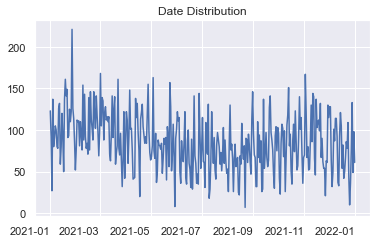

In [19]:
# Plotting date distribution to understand the dataset
fig1 = d1.plot.line(title = "Date Distribution")
plt.xticks(rotation = 360)
fig1

The plot above describes:
* How distributed the data is based on its date, which has more data in early 2021, but evenly distributed for the rest of the year


In [20]:
df["workoutId"].value_counts()

TasjLzSkZL    30
qKDSREiCT1    30
EofUrropEV    25
b2j5oNU9pJ    25
uwxcoHul4t    25
              ..
ShaXX9LCFF     1
WS6SsEhtm4     1
ivHEAKrmFX     1
3ksGBE1vUV     1
Mvf6hAndeY     1
Name: workoutId, Length: 4976, dtype: int64

In [21]:
df["exerciseId"].value_counts()

G1mxtZtEs5    1578
AF7Qq7XK2r    1289
EAjKaB5zWy    1220
djuvlRHUvb     985
otjt26R0oL     963
              ... 
SGoBKeSD4r       7
LaUm5Jl8hd       6
CTAGAxuKs9       3
dldAGWTRYw       3
olwH9a4pKv       3
Name: exerciseId, Length: 105, dtype: int64

In [22]:
df["singleSetId"].value_counts()

2Ef9bES8oX    1
047E5YHTOL    1
R2bcuImfz8    1
bDv0EU0IYK    1
A5pIDPHecE    1
             ..
dF1AQSW1SH    1
H8EiO3smBJ    1
mqQI3PyoUV    1
KccIgmWpfl    1
jsk5NGLo7y    1
Name: singleSetId, Length: 31279, dtype: int64

In [23]:
df["exerciseName"].value_counts()

Back Squat                      1578
Air Squats                      1289
Dumbbell Kickbacks              1220
Dumbbell Rear Delt Raise         985
Barbell Shoulder Press           963
                                ... 
TRX Single Leg Squat               7
Sled Pull                          6
Kettlebell Pistol Squat            3
Forward Stability Ball Plank       3
Knee Raise                         3
Name: exerciseName, Length: 105, dtype: int64

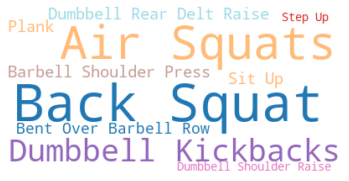

In [24]:
# Plot exerciseName to understand what are the top 10 exercises
exercise_str = Counter(df['exerciseName'])
wordcloud = WordCloud(max_words = 10, background_color = "White", collocations = False, colormap = "tab20").generate_from_frequencies(exercise_str)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

From the wordcloud above we can understand that:
* Back Squat, Air Squats, Dumbbell Kickbacks are the top 3 exercises
* We can hypothesize that these represent exercises that do not require equipment
* Thus we may deduce that majority of Fitbod users utilize the app for at-home exercises

In [25]:
r1 = df["reps"].value_counts()[:10]

<AxesSubplot:title={'center':'Rep Distribution'}>

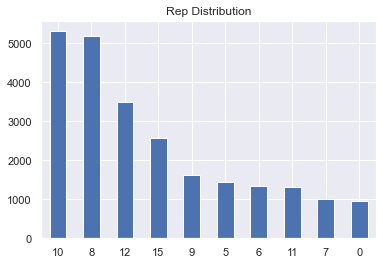

In [26]:
# Plot to understand popular number of reps
fig2 = r1.plot.bar(title = "Rep Distribution")
plt.xticks(rotation = 360)
fig2

The figure above shows:
* The most popular rep count is 10, 8, 12, 15 in the overall dataset

In [27]:
df["weight"] = df["weight"].round(2)
df["weight"].value_counts()

0.00      8911
9.07      1419
4.54      1145
6.80      1114
11.34      985
          ... 
102.51       1
7.71         1
130.00       1
61.00        1
29.00        1
Name: weight, Length: 222, dtype: int64

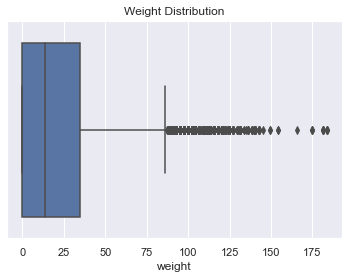

In [28]:
# Plot to understand popular number of weights
# dist = sns.displot(df, x = "weight", binwidth = 20, palette = "Accent_r")
dist = sns.boxplot(x = df["weight"])
dist = plt.title("Weight Distribution") # label title

Insights from the chart above:
* Many outliers beyond 80kg equipment weight
* Majority workouts do not involve any weight equipment
* Indicates that the focus are often on exercises without weights, aligning with wordcloud results

In [29]:
df["fake_user_id"].value_counts()

fake_id_531    1636
fake_id_541    1537
fake_id_537    1119
fake_id_532    1114
fake_id_545    1070
               ... 
fake_id_596      16
fake_id_597      15
fake_id_604       7
fake_id_603       5
fake_id_600       5
Name: fake_user_id, Length: 81, dtype: int64

From the overall analysis of the data, we can understand that the overall data involves workouts that do not involve equipment and weights, such as Back Squat and Air Squats. And that the data runs from January to July of 2021.


## Individual User
Next, we want to identify how an average user uses Fitbod.

1. For a typical user
* average workouts per month
* average sets per workout
* average weight per sets
* average reps per sets
* Popular exercises per user by month


In [30]:
## Aggregate data by user
# Using median considering presence of outliers
df_user = df.groupby(['Month', 'fake_user_id', 'workoutId', 'singleSetId', 'reps', 'exerciseName']).agg(weight = ("weight", "median")).round(2).reset_index()
df_user.head()

## Aggregate by month
#### average workouts per month

## aggregate by workout
#### average

,Month,fake_user_id,workoutId,singleSetId,reps,exerciseName,weight
0,2021-01,fake_id_524,3bgttWmkDt,19TulnSaHt,8,Dumbbell Pullover,11.34
1,2021-01,fake_id_524,3bgttWmkDt,1VDo0tAWDD,8,Dumbbell Kickbacks,6.80
2,2021-01,fake_id_524,3bgttWmkDt,WUNQrsxA68,8,Dumbbell Shoulder Raise,4.54
3,2021-01,fake_id_524,3bgttWmkDt,b6xmBO9vIm,8,Dumbbell Kickbacks,6.80
4,2021-01,fake_id_524,3bgttWmkDt,fZzDwrkveZ,8,Dumbbell Kickbacks,6.80


Text(0.5, 1.0, 'Workout Count Distribution')


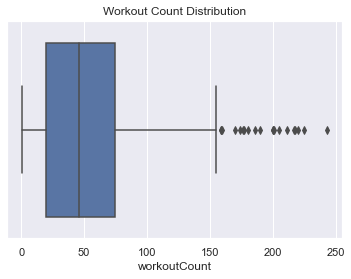

In [31]:
# Average Workouts
### workout counts per month
df_wo = df_user.groupby([ "Month", "fake_user_id"]).agg(workoutCount = ("workoutId", "count")).reset_index()
df_wo.head()

# Plotting boxplot to identify outliers 
dist = sns.boxplot(x = df_wo["workoutCount"])
dist = plt.title("Workout Count Distribution")
print(dist)

Text(0, 0.5, 'Number of Workouts')

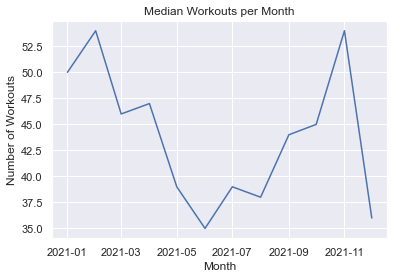

In [32]:
### median workouts per month
### using median based on boxplot results
df_wo_avg = df_wo.groupby(["Month"]).agg(avg_workoutCount = ("workoutCount", "median")).round().reset_index()
df_wo_avg['Month'] = df_wo_avg['Month'].astype(str)
df_wo_avg["Month"] = pd.to_datetime(df_wo_avg["Month"])
df_wo_avg.dtypes
df_wo_avg.head()


sns.lineplot(data = df_wo_avg, x="Month", y = "avg_workoutCount")
plt.title("Median Workouts per Month")
plt.ylabel('Number of Workouts')

Insights:
* Users tend to workout more during the winter months
* This could indicate preparation for warmer activities, in which people tend to do outdoor activities more than indoor ones -- not working out during warmer months

Text(0.5, 1.0, 'Workout Count Distribution')


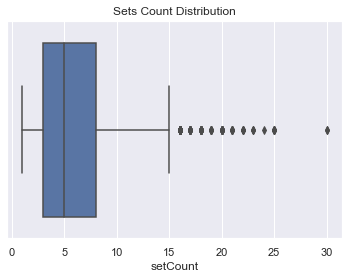

In [60]:
# Average Sets
### Sets counts per workout
df_sets = df_user.groupby(["fake_user_id", "workoutId"]).agg(setCount = ("singleSetId", "count")).reset_index()
df_sets.head()

# Plotting boxplot to identify outliers 
dist_set = sns.boxplot(x = df_sets["setCount"])
dist_set = plt.title("Sets Count Distribution")
print(dist)

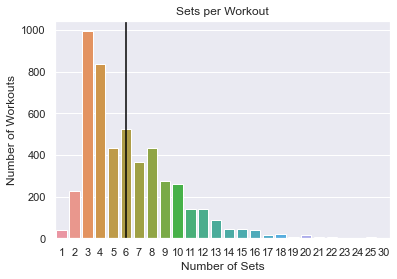

In [91]:
# sets per workout
df_sets_avg = df_sets.groupby(["workoutId"]).agg(avg_setCount = ("setCount", "median")).round().reset_index()
df_sets_avg.head()

# # Count Plot to show how many sets do users typically include in a workout
sns.countplot(data = df_sets, x="setCount")
plt.title("Sets per Workout")
plt.ylabel('Number of Workouts')
plt.xlabel('Number of Sets')
# Adding a median line
plt.axvline(x=df_sets.setCount.median(),
            color='black')

Insights:
* Median number of sets per workout is 6
* Most workouts tend to include between 3-4 sets

Line2D(_line0)


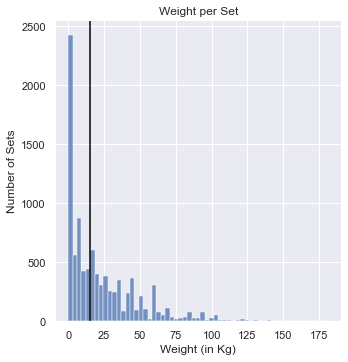

In [99]:
# Filter data where setCount = 3, 4, 6
df_set_filt = df_sets_avg.loc[(df_sets_avg["avg_setCount"] == 3) | (df_sets_avg["avg_setCount"] == 4) | (df_sets_avg["avg_setCount"] == 6)]
# Inner join on workoutId for df_set_filt and df_user to only focus on these workouts
df_set_inner = df_user.merge(df_set_filt, on = 'workoutId', how = 'inner')
df_set_inner.head(20)

# Average Weight per Sets
# Find the avg weight based on these sets
df_wgt = df_set_inner.groupby(["singleSetId"]).agg(avg_weight = ("weight", "median")).reset_index()
df_wgt.head()
# Shows median weight for a set



# Adding a median line
dist_wgt = sns.displot(x = df_wgt["avg_weight"])
dist_wgt = plt.title("Weight per Set")
plt.ylabel('Number of Sets')
plt.xlabel('Weight (in Kg)')
dist_wgt = plt.axvline(x=df_wgt.avg_weight.median(),
            color='black')
print(dist_wgt)


Insights:
* Majority of the sets involve 0kg weights, meaning no equipment
* However, the median is around 20kg weights, which can tell us about what kind of users are using Fitbod
* Hypothesize that these users focus on the goals: General Fitness, Muscle Tone, BodyBuilding with lower weights

Line2D(_line0)


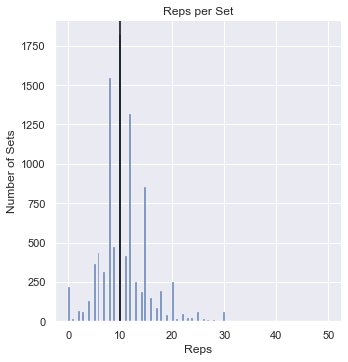

In [100]:
# Average Reps per Sets
# Find the avg rep based on sets filtered
df_rep = df_set_inner.groupby(["singleSetId"]).agg(avg_rep = ("reps", "median")).reset_index()
df_rep.head()

# Adding a median line
dist_rep = sns.displot(x = df_rep["avg_rep"])
dist_rep = plt.title("Reps per Set")
plt.ylabel('Number of Sets')
plt.xlabel('Reps')
dist_rep = plt.axvline(x=df_rep.avg_rep.median(),
            color='black')
print(dist_rep)


Insights:
* On average, the median rep per set is 10
* While the mode is 8 reps per set
* Does not support the hypothesis that most users' goals are above -- since fewer reps represents Strength Training, but this is usually paired with higher weights


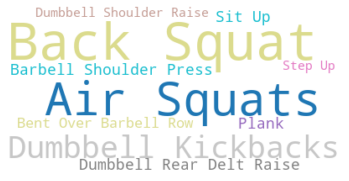

In [101]:
# Top 10 exercises per user by month
exercise_str = Counter(df_user['exerciseName'])
wordcloud = WordCloud(max_words = 10, background_color = "White", collocations = False, colormap = "tab20").generate_from_frequencies(exercise_str)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Insights:
* 50% of these exercises (Air Squats, Back Squats, Plank, Step Up, Sit Up) do not need weights in line with previous findings
* 80% of these exercises (^^ + Dumbbell Shoulder Raise, Dumbbell Kickbacks, Dumbbell Rear Delt Raise) can be done at home

### Summary
Based on these findings, it seems that most users tend to be clustered with the same goals: General Fitness, Muscle Tone, Bodybuilding, Strength-training.
More specifically, on average these users tend to:
* Workout more in the colder months (October - March)
* Exercise for 3-6 sets per workout
* Use 0kg or ~20kg weights and 8 or 10 reps per set
* Exercise at home

This is especially supportive of the 2021 data which is still affected by the pandemic, and thus staying indoors more often than not.